<a href="https://colab.research.google.com/github/Tonry12/BSC_DPDM23/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
shopping_data = pd.read_csv('/content/drive/MyDrive/DPDM2023/customer_shopping_data.csv')

shopping_data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


# ข้อมูลบางส่วนมีค่าตัวแปรบางตัวที่ไม่ทราบค่า (Missing Data)

In [86]:
import numpy as np


ตรวจสอบค่าก่อน missing

In [ ]:
shopping_data.isnull().any()

invoice_no        False
customer_id       False
gender            False
age               False
category          False
quantity          False
price             False
payment_method    False
invoice_date      False
shopping_mall     False
dtype: bool

##เราจะลบ price ของ records ที่เป็น cothing,cash,Metrocity เพื่อจะจำลอง missing data

ทำให้ price เป็น missing

In [ ]:
shopping_new = shopping_data[shopping_data['category']=='Clothing']
shopping_new2=shopping_new[shopping_new['payment_method']=='Cash']
shopping_new3 = shopping_new2[shopping_new2['shopping_mall']=='Metrocity']
shopping_new3

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
382,I591015,C286181,Female,69,Clothing,1,300.08,Cash,12/9/2021,Metrocity
446,I423124,C109593,Female,66,Clothing,1,300.08,Cash,7/1/2023,Metrocity
531,I223795,C280596,Male,40,Clothing,3,900.24,Cash,26/12/2022,Metrocity
647,I891465,C175833,Female,19,Clothing,1,300.08,Cash,21/07/2022,Metrocity
...,...,...,...,...,...,...,...,...,...,...
98987,I693615,C323954,Female,33,Clothing,2,600.16,Cash,7/2/2021,Metrocity
99153,I922072,C336171,Male,47,Clothing,4,1200.32,Cash,22/01/2021,Metrocity
99178,I135939,C211085,Male,40,Clothing,3,900.24,Cash,1/11/2022,Metrocity
99339,I287566,C216529,Female,48,Clothing,1,300.08,Cash,25/02/2023,Metrocity


In [ ]:
hasmissing = shopping_data[(shopping_data['category']=='Clothing') &
              (shopping_data['payment_method']=='Cash') &
              (shopping_data['shopping_mall']=='Metrocity')]

In [ ]:
hasmissing['price']= np.nan #ทำให้ค่ากลายเป็น missing

<ipython-input-46-e70a23699fed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hasmissing['price']= np.nan #ทำให้ค่ากลายเป็น missing


เเยกค่าที่ไม่ทำ missing value

In [ ]:
hasmissing

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
2,I127801,C266599,Male,20,Clothing,1,NaN,Cash,9/11/2021,Metrocity
382,I591015,C286181,Female,69,Clothing,1,NaN,Cash,12/9/2021,Metrocity
446,I423124,C109593,Female,66,Clothing,1,NaN,Cash,7/1/2023,Metrocity
531,I223795,C280596,Male,40,Clothing,3,NaN,Cash,26/12/2022,Metrocity
647,I891465,C175833,Female,19,Clothing,1,NaN,Cash,21/07/2022,Metrocity
...,...,...,...,...,...,...,...,...,...,...
98987,I693615,C323954,Female,33,Clothing,2,NaN,Cash,7/2/2021,Metrocity
99153,I922072,C336171,Male,47,Clothing,4,NaN,Cash,22/01/2021,Metrocity
99178,I135939,C211085,Male,40,Clothing,3,NaN,Cash,1/11/2022,Metrocity
99339,I287566,C216529,Female,48,Clothing,1,NaN,Cash,25/02/2023,Metrocity


In [ ]:
nonmissing=shopping_data[(shopping_data['category']!='Clothing') |
              (shopping_data['payment_method']!='Cash') |
              (shopping_data['shopping_mall']!='Metrocity')]

เอาค่ากลับมารวม ทั้งมีค่าnull กับ ไม่มีค่า null

In [ ]:
new_shopping_data = pd.concat([hasmissing,nonmissing]).reset_index()
new_shopping_data.shape

(99457, 11)

## Example

In [ ]:
new_shopping_data

,index,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,2,I127801,C266599,Male,20,Clothing,1,NaN,Cash,9/11/2021,Metrocity
1,382,I591015,C286181,Female,69,Clothing,1,NaN,Cash,12/9/2021,Metrocity
2,446,I423124,C109593,Female,66,Clothing,1,NaN,Cash,7/1/2023,Metrocity
3,531,I223795,C280596,Male,40,Clothing,3,NaN,Cash,26/12/2022,Metrocity
4,647,I891465,C175833,Female,19,Clothing,1,NaN,Cash,21/07/2022,Metrocity
...,...,...,...,...,...,...,...,...,...,...,...
99452,99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [ ]:
new_shopping_data.isnull().any() #ถ้าอันไหนมีค่า null จะขึ้น True

index             False
invoice_no        False
customer_id       False
gender            False
age               False
category          False
quantity          False
price              True
payment_method    False
invoice_date      False
shopping_mall     False
dtype: bool

In [ ]:
new_shopping_data.describe()

,index,age,quantity,price
count,99457.000000,99457.000000,99457.000000,97173.000000
mean,49728.000000,43.427089,3.003429,684.423873
std,28710.907199,14.990054,1.413025,949.438067
min,0.000000,18.000000,1.000000,5.230000
25%,24864.000000,30.000000,2.000000,40.660000
50%,49728.000000,43.000000,3.000000,203.300000
75%,74592.000000,56.000000,4.000000,1200.320000
max,99456.000000,69.000000,5.000000,5250.000000


### ignore (ลบออก)

###Quiz
* data หายไปกี่ %
* mean data รวมหลังจากเเก้ missing เป็นค่าเท่าไร

In [ ]:
dropna_data=new_shopping_data.dropna()

In [ ]:
#ดูว่าเมื่อเราลบ na แล้ว ข้อมูลเราหายไปกี่ %
100*(len(new_shopping_data)-len(dropna_data))/len(new_shopping_data)

2.2964698311833254

In [ ]:
dropna_data.describe() #เมื่อลบค่า null แล้ว meanเรา = ุ684.42

,index,age,quantity,price
count,97173.000000,97173.000000,97173.000000,97173.000000
mean,49719.605158,43.421671,3.003931,684.423873
std,28719.460446,14.990459,1.413123,949.438067
min,0.000000,18.000000,1.000000,5.230000
25%,24848.000000,30.000000,2.000000,40.660000
50%,49715.000000,43.000000,3.000000,203.300000
75%,74596.000000,56.000000,4.000000,1200.320000
max,99456.000000,69.000000,5.000000,5250.000000


### 2.เติมด้วย unknown *เราจะเติมกับข้อมูล categorical

### 3. เติมค่าด้วย missing value

In [ ]:
new_shopping_data_full=new_shopping_data.fillna(dropna_data['price'].mean())

In [ ]:
new_shopping_data_full

,index,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,2,I127801,C266599,Male,20,Clothing,1,684.423873,Cash,9/11/2021,Metrocity
1,382,I591015,C286181,Female,69,Clothing,1,684.423873,Cash,12/9/2021,Metrocity
2,446,I423124,C109593,Female,66,Clothing,1,684.423873,Cash,7/1/2023,Metrocity
3,531,I223795,C280596,Male,40,Clothing,3,684.423873,Cash,26/12/2022,Metrocity
4,647,I891465,C175833,Female,19,Clothing,1,684.423873,Cash,21/07/2022,Metrocity
...,...,...,...,...,...,...,...,...,...,...,...
99452,99452,I219422,C441542,Female,45,Souvenir,5,58.650000,Credit Card,21/09/2022,Kanyon
99453,99453,I325143,C569580,Male,27,Food & Beverage,2,10.460000,Cash,22/09/2021,Forum Istanbul
99454,99454,I824010,C103292,Male,63,Food & Beverage,2,10.460000,Debit Card,28/03/2021,Metrocity
99455,99455,I702964,C800631,Male,56,Technology,4,4200.000000,Cash,16/03/2021,Istinye Park


In [ ]:
new_shopping_data_full.describe()

,index,age,quantity,price
count,99457.000000,99457.000000,99457.000000,99457.000000
mean,49728.000000,43.427089,3.003429,684.423873
std,28710.907199,14.990054,1.413025,938.472859
min,0.000000,18.000000,1.000000,5.230000
25%,24864.000000,30.000000,2.000000,45.450000
50%,49728.000000,43.000000,3.000000,203.300000
75%,74592.000000,56.000000,4.000000,1200.320000
max,99456.000000,69.000000,5.000000,5250.000000


  4.เติมด้วยค่าเฉลี่ยของกลุ่ม

quiz
- mean หลังเติมด้วยค่าเฉลี่ย Clothing
- mean หลังเติมด้วยค่าเฉลี่ย Cash
- mean หลังเติมด้วยค่าเฉลี่ย Metrocity
- mean หลังเติมด้วยค่าเฉลี่ย Cash+Metrocity

In [ ]:

new_shopping_data[new_shopping_data['category']=='Clothing']['price'].mean()

901.5259373350307

In [ ]:
#1
new_shopping_data_fillcloth = new_shopping_data.fillna(
 {'price' :new_shopping_data[new_shopping_data['category']=='Clothing']['price'] .mean()})
new_shopping_data_fillcloth.describe()

,index,age,quantity,price
count,99457.000000,99457.000000,99457.000000,99457.000000
mean,49728.000000,43.427089,3.003429,689.409557
std,28710.907199,14.990054,1.413025,939.036135
min,0.000000,18.000000,1.000000,5.230000
25%,24864.000000,30.000000,2.000000,45.450000
50%,49728.000000,43.000000,3.000000,203.300000
75%,74592.000000,56.000000,4.000000,1200.320000
max,99456.000000,69.000000,5.000000,5250.000000


In [ ]:
#2
new_shopping_data_fillcloth = new_shopping_data.fillna(
 {'price' :new_shopping_data[new_shopping_data['payment_method']=='Cash']['price'] .mean()})
new_shopping_data_fillcloth.describe()

,index,age,quantity,price
count,99457.000000,99457.000000,99457.000000,99457.000000
mean,49728.000000,43.427089,3.003429,684.317022
std,28710.907199,14.990054,1.413025,938.473117
min,0.000000,18.000000,1.000000,5.230000
25%,24864.000000,30.000000,2.000000,45.450000
50%,49728.000000,43.000000,3.000000,203.300000
75%,74592.000000,56.000000,4.000000,1200.320000
max,99456.000000,69.000000,5.000000,5250.000000


In [ ]:
#3
new_shopping_data_fillcloth = new_shopping_data.fillna(
 {'price' :new_shopping_data[new_shopping_data['shopping_mall']=='Metrocity']['price'] .mean()})
new_shopping_data_fillcloth.describe()

,index,age,quantity,price
count,99457.000000,99457.000000,99457.000000,99457.000000
mean,49728.000000,43.427089,3.003429,683.513500
std,28710.907199,14.990054,1.413025,938.491645
min,0.000000,18.000000,1.000000,5.230000
25%,24864.000000,30.000000,2.000000,45.450000
50%,49728.000000,43.000000,3.000000,203.300000
75%,74592.000000,56.000000,4.000000,1200.320000
max,99456.000000,69.000000,5.000000,5250.000000


# ข้อมูลมีความซ้ำซ้อน (Duplicate Data)

## Example

## Fix

# ข้อมูลบางตัวในชุดข้อมูลมีลักษณะผิดปกติหรือแตกต่างจากข้อมูลส่วนใหญ่ (Outlier)

In [76]:
from matplotlib import pyplot as plt

## Example

{'whiskers': [<matplotlib.lines.Line2D at 0x7806f7d6bd30>,
 'caps': [<matplotlib.lines.Line2D at 0x7806f7d6b2b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7806f7d68b80>],
 'medians': [<matplotlib.lines.Line2D at 0x7806f7d68d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7806f7d6be50>],
 'means': []}

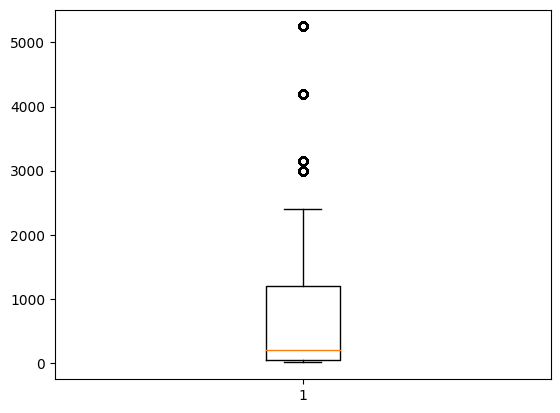

In [77]:
plt.boxplot(shopping_data['price'])

## Fix
ลบค่า outlier

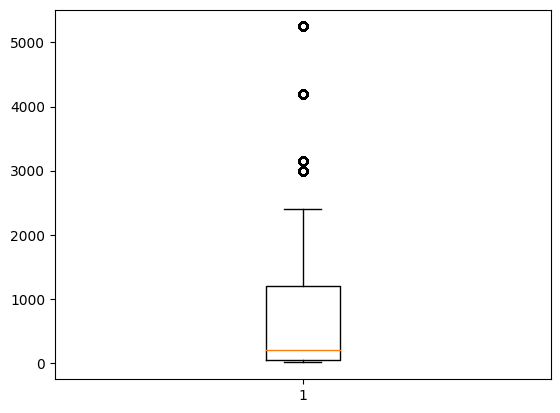

In [78]:
ret = plt.boxplot(shopping_data['price'])

In [80]:
ret #เราจะเอาค่าตรง whiskers เพราะมันคือค่าสูงสุด-ต่ำสุดที่ยอมรับได้ ถ้าเกินนั้นคือ outlier

{'whiskers': [<matplotlib.lines.Line2D at 0x7806f820abc0>,
 'caps': [<matplotlib.lines.Line2D at 0x7806f8209f60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7806f820a0b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7806f8208d00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7806f820a3e0>],
 'means': []}

In [82]:
ret['whiskers'][0].get_ydata() #หนวดแมวด้านล่าง มี2ค่าคือ  5 กับ 45

array([45.45,  5.23])

In [84]:
ret['whiskers'][1].get_ydata() #หนวดแมวด้านบน มี2ค่าคือ  1200.32 กับ 2400.68

array([1200.32, 2400.68])

In [85]:
# วิธีการดึงค่าออกมาจากหนวดแมว
ret['whiskers'][1].get_ydata()[1]

2400.68

จากนั้นเราจะตัดค่า outlier ออกไป

In [88]:
shopping_data[shopping_data['price']<=ret['whiskers'][1].get_ydata()[1]]
# หมายถึง จงลบค่าที่เกินค่า whiskers ที่สูงที่สุด นั่นคือลบค่าที่เกิน 2400.68 ขึ้นไป เพราะเป็น outlier

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
5,I227836,C657758,Female,28,Clothing,5,1500.40,Credit Card,24/05/2022,Forum Istanbul
...,...,...,...,...,...,...,...,...,...,...
99451,I675411,C513603,Male,50,Toys,5,179.20,Cash,9/10/2021,Metropol AVM
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity


# ค่าตัวแปรบางตัวที่ไม่ถูกต้อง (Erroneous Data)

## Example

## Fix

# ข้อมูลมีค่าตัวแปรไม่สอดคล้องซึ่งกันและกัน (Inconsistent)

## Example

## Fix

## Example